In [3]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn .metrics import accuracy_score 
from sklearn.model_selection import train_test_split



# pd.set_option('display.max_columns',None)
# warnings.filterwarnings('ignore')
%matplotlib inline 

In [4]:
dataset=pd.read_csv("reviews_dataset.csv",encoding='latin1')

In [5]:
dataset.head()

,AirName,AircraftModel,Comments,DateFlown,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,...,ReviewrCountry,Route,SeatComfortRating,SeatType,ServiceRating,TravelType,ValueRating,WifiRating,Unnamed: 19,Unnamed: 20
0,airasia,A320,"| According their check in process, they men...",Oct-22,1,1.0,1,1.0,NaN,9th November 2022,...,(Malaysia),Krabi to Kuala Lumpur,1,Economy Class,3,Solo Leisure,2,1.0,NaN,NaN
1,airasia,NaN,"? , | Nice, uneventful short flight, clean air...",Nov-22,0,0.0,5,9.0,yes,7th November 2022,...,(Malaysia),Udon Thani to Bangkok,4,Economy Class,5,Solo Leisure,5,0.0,NaN,NaN
2,airasia,A320,"? , | Never again with AirAsia. I wish I could...",Nov-22,0,1.0,1,1.0,NaN,6th November 2022,...,(Malaysia),Bangkok (Don Muang) to Jakarta,1,Economy Class,1,Solo Leisure,2,0.0,NaN,NaN
3,airasia,NaN,"? , | My wife has problems with her knees and...",Oct-22,0,0.0,1,2.0,yes,2nd November 2022,...,(Malaysia),Penang to Danang via Kuala Lumpur,1,Economy Class,1,Couple Leisure,1,0.0,NaN,NaN
4,airasia,NaN,"? , | My flight was suppose to be at 4.35 pm ...",Oct-22,0,0.0,1,1.0,NaN,1st November 2022,...,(Malaysia),Singapore to Kuala lumpur,1,Economy Class,1,Solo Leisure,1,0.0,NaN,NaN


In [6]:
dataset.count()
dataset.shape

(19534, 21)

In [7]:
dataset.isna().sum()

AirName                    0
AircraftModel          13163
Comments                   0
DateFlown               3573
EntertainmentRating        0
FoodRating                 2
GroundServiceRating        0
OverallScore             398
Recommended            11947
ReviewDate                 0
ReviewTitle                0
ReviewrCountry             0
Route                   3636
SeatComfortRating          0
SeatType                 130
ServiceRating              0
TravelType              3555
ValueRating                0
WifiRating                 2
Unnamed: 19            19532
Unnamed: 20            19532
dtype: int64

In [8]:
dataset.duplicated().sum()

586

In [9]:
dataset.drop_duplicates(inplace=True)

In [10]:
dataset.duplicated().sum()

0

In [11]:
dataset.drop(['Unnamed: 19','Unnamed: 20'], axis=1,inplace=True)

In [12]:
dataset.head()

,AirName,AircraftModel,Comments,DateFlown,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,Route,SeatComfortRating,SeatType,ServiceRating,TravelType,ValueRating,WifiRating
0,airasia,A320,"| According their check in process, they men...",Oct-22,1,1.0,1,1.0,NaN,9th November 2022,"""They should bring more food""",(Malaysia),Krabi to Kuala Lumpur,1,Economy Class,3,Solo Leisure,2,1.0
1,airasia,NaN,"? , | Nice, uneventful short flight, clean air...",Nov-22,0,0.0,5,9.0,yes,7th November 2022,"""Nice, uneventful short flight""",(Malaysia),Udon Thani to Bangkok,4,Economy Class,5,Solo Leisure,5,0.0
2,airasia,A320,"? , | Never again with AirAsia. I wish I could...",Nov-22,0,1.0,1,1.0,NaN,6th November 2022,"""Never again with AirAsia""",(Malaysia),Bangkok (Don Muang) to Jakarta,1,Economy Class,1,Solo Leisure,2,0.0
3,airasia,NaN,"? , | My wife has problems with her knees and...",Oct-22,0,0.0,1,2.0,yes,2nd November 2022,"""when it was time to board no wheelchair""",(Malaysia),Penang to Danang via Kuala Lumpur,1,Economy Class,1,Couple Leisure,1,0.0
4,airasia,NaN,"? , | My flight was suppose to be at 4.35 pm ...",Oct-22,0,0.0,1,1.0,NaN,1st November 2022,"""a very bad experience for me""",(Malaysia),Singapore to Kuala lumpur,1,Economy Class,1,Solo Leisure,1,0.0


In [13]:
dataset.isna().sum()

AirName                    0
AircraftModel          12776
Comments                   0
DateFlown               3547
EntertainmentRating        0
FoodRating                 2
GroundServiceRating        0
OverallScore             393
Recommended            11534
ReviewDate                 0
ReviewTitle                0
ReviewrCountry             0
Route                   3609
SeatComfortRating          0
SeatType                 127
ServiceRating              0
TravelType              3529
ValueRating                0
WifiRating                 2
dtype: int64

In [14]:
dataset.drop(['DateFlown','AircraftModel'], axis=1,inplace=True)

In [15]:
dataset.isna().sum()

AirName                    0
Comments                   0
EntertainmentRating        0
FoodRating                 2
GroundServiceRating        0
OverallScore             393
Recommended            11534
ReviewDate                 0
ReviewTitle                0
ReviewrCountry             0
Route                   3609
SeatComfortRating          0
SeatType                 127
ServiceRating              0
TravelType              3529
ValueRating                0
WifiRating                 2
dtype: int64

In [16]:
# interpolation only for foodRating as it is only the continuos data 
dataset['FoodRating'] = dataset['FoodRating'].interpolate()

dataset['OverallScore' ] = dataset['OverallScore'].interpolate()

In [17]:
# dataset.isna().sum()
dataset['AirName'].value_counts()

united-airlines                        390
frontier-airlines                      390
spicejet                               390
korean-air                             390
lufthansa                              390
malaysia-airlines                      390
air-europa                             390
oman-air                               390
philippine-airlines                    390
spirit-airlines                        390
qantas-airways                         390
qatar-airways                          390
ryanair                                390
sas-scandinavian-airlines              390
scoot                                  390
singapore-airlines                     390
south-african-airways                  390
hawaiian-airlines                      390
southwest-airlines                     390
austrian-airlines                      390
swoop                                  390
air-france                             390
Air India                              390
ethiopian-a

In [18]:
dataset["OverallScore"].value_counts()

1.000000     6840
10.000000    2319
2.000000     1818
9.000000     1774
8.000000     1569
             ... 
5.666667        1
1.333333        1
1.666667        1
5.200000        1
4.666667        1
Name: OverallScore, Length: 97, dtype: int64

In [19]:
dataset["OverallScore"]=dataset["OverallScore"].astype(int)

In [20]:
dataset["OverallScore"].value_counts()

1     6858
10    2319
2     1843
9     1799
8     1600
3     1249
7     1030
5      826
4      721
6      701
0        2
Name: OverallScore, dtype: int64

In [21]:
# dataset.drop(['Route','TravelType'], axis=1,inplace=True)
df=dataset
label_encoder = LabelEncoder()
df['Route_encoded'] = label_encoder.fit_transform(df['Route'])
correlation_matrix = df.corr()
route_correlation = correlation_matrix['Route_encoded'].drop('Route_encoded')
print(route_correlation)
# overallscore and value rating

<IPython.core.display.Javascript object>

FoodRating             0.072186
GroundServiceRating   -0.312408
OverallScore           0.161389
ServiceRating          0.022761
ValueRating            0.101847
WifiRating            -0.111753
Name: Route_encoded, dtype: float64


C:\Users\bharu\AppData\Local\Temp\ipykernel_11828\3452752319.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [22]:
from collections import Counter
df =dataset

# Group by relevant features
groups = df.groupby(['OverallScore', 'ValueRating'])
groups.head()



,AirName,Comments,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,Route,SeatComfortRating,SeatType,ServiceRating,TravelType,ValueRating,WifiRating,Route_encoded
0,airasia,"| According their check in process, they men...",1,1.0,1,1,NaN,9th November 2022,"""They should bring more food""",(Malaysia),Krabi to Kuala Lumpur,1,Economy Class,3,Solo Leisure,2,1.0,4897
1,airasia,"? , | Nice, uneventful short flight, clean air...",0,0.0,5,9,yes,7th November 2022,"""Nice, uneventful short flight""",(Malaysia),Udon Thani to Bangkok,4,Economy Class,5,Solo Leisure,5,0.0,10184
2,airasia,"? , | Never again with AirAsia. I wish I could...",0,1.0,1,1,NaN,6th November 2022,"""Never again with AirAsia""",(Malaysia),Bangkok (Don Muang) to Jakarta,1,Economy Class,1,Solo Leisure,2,0.0,869
3,airasia,"? , | My wife has problems with her knees and...",0,0.0,1,2,yes,2nd November 2022,"""when it was time to board no wheelchair""",(Malaysia),Penang to Danang via Kuala Lumpur,1,Economy Class,1,Couple Leisure,1,0.0,8205
4,airasia,"? , | My flight was suppose to be at 4.35 pm ...",0,0.0,1,1,NaN,1st November 2022,"""a very bad experience for me""",(Malaysia),Singapore to Kuala lumpur,1,Economy Class,1,Solo Leisure,1,0.0,9271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10180,pegasus-airlines,Amsterdam to Tel Aviv via Istanbul. I am writi...,0,0.0,1,2,NaN,6th January 2016,"""waiting at lost and found""",(France),AMS to TLV via SAW,2,Economy Class,2,Family Leisure,5,0.0,66
10245,pegasus-airlines,Arrived at Stansted airport to be told that th...,1,1.0,0,9,NaN,4th June 2015,Pegasus Airlines customer review,(United Kingdom),NaN,1,Economy Class,1,NaN,2,0.0,10786
10927,pia-pakistan-international-airlines,LHR-KHI-LHR route. Both legs were great. Fligh...,0,0.0,0,4,NaN,26th August 2008,Pakistan Intl Airlines customer review,(United Kingdom),NaN,0,NaN,0,NaN,0,0.0,10786
14173,saudi-arabian-airlines,Travelled earlier this week with family and 2 ...,4,2.0,0,10,NaN,19th January 2015,Saudi Arabian Airlines customer review,(United Kingdom),NaN,4,Economy Class,1,NaN,2,0.0,10786


In [23]:
label_encoder = LabelEncoder()
df['TravelType_encoded'] = label_encoder.fit_transform(df['TravelType'])
correlation_matrix = df.corr()
route_correlation = correlation_matrix['TravelType_encoded'].drop('TravelType_encoded')
print(route_correlation)

<IPython.core.display.Javascript object>

FoodRating             0.078235
GroundServiceRating   -0.280483
OverallScore           0.196872
ServiceRating          0.035346
ValueRating            0.146704
WifiRating            -0.111641
Route_encoded          0.344815
Name: TravelType_encoded, dtype: float64


C:\Users\bharu\AppData\Local\Temp\ipykernel_11828\2725665356.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [24]:
from collections import Counter


# Group by relevant features
groups = df.groupby(['OverallScore', 'ValueRating','Route_encoded'])
print(groups.head())

# Function to impute missing Route values
def impute_route(group):
    # Find the most common route in the group
    most_common_route = group['TravelType'].mode()
    if not most_common_route.empty:
        most_common_route = most_common_route.iloc[0]
    else:
        most_common_route = 'Unknown'  # Fallback value if no common route is found

    # Fill missing values with the most common route or fallback
    group['TravelType'] = group['TravelType'].fillna(most_common_route)
    return group
# Apply the imputation
df = groups.apply(impute_route)

print(df)

               AirName                                           Comments  \
0              airasia   |  According their check in process, they men...   
1              airasia  ? , | Nice, uneventful short flight, clean air...   
2              airasia  ? , | Never again with AirAsia. I wish I could...   
3              airasia  ? , |  My wife has problems with her knees and...   
4              airasia  ? , |  My flight was suppose to be at 4.35 pm ...   
...                ...                                                ...   
19529  united-airlines   |  My whole experience this evening, from an ...   
19530  united-airlines  ? , |  United is the most unorganized airline ...   
19531  united-airlines   |  We flew from FL to Houston on February 25t...   
19532  united-airlines  ? , |  Stuck in Denver for almost 24 hours bec...   
19533  united-airlines  ? , |  We had a connecting flight through Newa...   

      EntertainmentRating  FoodRating  GroundServiceRating  OverallScore  \

C:\Users\bharu\AppData\Local\Temp\ipykernel_11828\737338912.py:21: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = groups.apply(impute_route)


               AirName                                           Comments  \
0              airasia   |  According their check in process, they men...   
1              airasia  ? , | Nice, uneventful short flight, clean air...   
2              airasia  ? , | Never again with AirAsia. I wish I could...   
3              airasia  ? , |  My wife has problems with her knees and...   
4              airasia  ? , |  My flight was suppose to be at 4.35 pm ...   
...                ...                                                ...   
19529  united-airlines   |  My whole experience this evening, from an ...   
19530  united-airlines  ? , |  United is the most unorganized airline ...   
19531  united-airlines   |  We flew from FL to Houston on February 25t...   
19532  united-airlines  ? , |  Stuck in Denver for almost 24 hours bec...   
19533  united-airlines  ? , |  We had a connecting flight through Newa...   

      EntertainmentRating  FoodRating  GroundServiceRating  OverallScore  \

In [25]:
df.isnull().sum()


AirName                    0
Comments                   0
EntertainmentRating        0
FoodRating                 0
GroundServiceRating        0
OverallScore               0
Recommended            11534
ReviewDate                 0
ReviewTitle                0
ReviewrCountry             0
Route                   3609
SeatComfortRating          0
SeatType                 127
ServiceRating              0
TravelType                 0
ValueRating                0
WifiRating                 2
Route_encoded              0
TravelType_encoded         0
dtype: int64

In [26]:
# Drop rows where 'SeatType' has null values
df = df.dropna(subset=['SeatType'])


In [27]:
df.isnull().sum()
df.shape

(18821, 19)

In [28]:
import nltk
# nltk.download('stopwords')
# nltk.download()

In [29]:
df.insert(3,"Review", " ")
df

,AirName,Comments,EntertainmentRating,Review,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,Route,SeatComfortRating,SeatType,ServiceRating,TravelType,ValueRating,WifiRating,Route_encoded,TravelType_encoded
0,airasia,"| According their check in process, they men...",1,,1.0,1,1,NaN,9th November 2022,"""They should bring more food""",(Malaysia),Krabi to Kuala Lumpur,1,Economy Class,3,Solo Leisure,2,1.0,4897,4
1,airasia,"? , | Nice, uneventful short flight, clean air...",0,,0.0,5,9,yes,7th November 2022,"""Nice, uneventful short flight""",(Malaysia),Udon Thani to Bangkok,4,Economy Class,5,Solo Leisure,5,0.0,10184,4
2,airasia,"? , | Never again with AirAsia. I wish I could...",0,,1.0,1,1,NaN,6th November 2022,"""Never again with AirAsia""",(Malaysia),Bangkok (Don Muang) to Jakarta,1,Economy Class,1,Solo Leisure,2,0.0,869,4
3,airasia,"? , | My wife has problems with her knees and...",0,,0.0,1,2,yes,2nd November 2022,"""when it was time to board no wheelchair""",(Malaysia),Penang to Danang via Kuala Lumpur,1,Economy Class,1,Couple Leisure,1,0.0,8205,1
4,airasia,"? , | My flight was suppose to be at 4.35 pm ...",0,,0.0,1,1,NaN,1st November 2022,"""a very bad experience for me""",(Malaysia),Singapore to Kuala lumpur,1,Economy Class,1,Solo Leisure,1,0.0,9271,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19529,united-airlines,"| My whole experience this evening, from an ...",1,,1.0,1,1,NaN,7th March 2022,"""made me feel like we were cattle to United Ai...",(United States),Portland to Portland,1,Economy Class,2,Family Leisure,1,0.0,8444,3
19530,united-airlines,"? , | United is the most unorganized airline ...",1,,1.0,1,1,NaN,6th March 2022,"""they have no clue what theyre doing""",(United States),Houston to Dublin via Newark,1,Economy Class,1,Family Leisure,1,1.0,4024,3
19531,united-airlines,| We flew from FL to Houston on February 25t...,0,,5.0,5,10,yes,6th March 2022,"""Our flight attendant was a blessing and very ...",(United States),Florida to Houston,5,Economy Class,5,Family Leisure,5,0.0,3333,3
19532,united-airlines,"? , | Stuck in Denver for almost 24 hours bec...",1,,1.0,1,1,NaN,5th March 2022,"""I will never fly united again""",(United States),Houston to Williston via Denver,1,Economy Class,1,Business,1,0.0,4077,0


In [30]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pandas as pd
nltk.download('stopwords')

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if not word in stop_words]
    return ' '.join(text)
df['Comments'] = df['Comments'].astype(str).apply(clean_text)
df['Review'] = df['Comments']

df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bharu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,AirName,Comments,EntertainmentRating,Review,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,Route,SeatComfortRating,SeatType,ServiceRating,TravelType,ValueRating,WifiRating,Route_encoded,TravelType_encoded
0,airasia,accord check process mention abl start onlin c...,1,accord check process mention abl start onlin c...,1.0,1,1,NaN,9th November 2022,"""They should bring more food""",(Malaysia),Krabi to Kuala Lumpur,1,Economy Class,3,Solo Leisure,2,1.0,4897,4
1,airasia,nice unev short flight clean aircraft super ni...,0,nice unev short flight clean aircraft super ni...,0.0,5,9,yes,7th November 2022,"""Nice, uneventful short flight""",(Malaysia),Udon Thani to Bangkok,4,Economy Class,5,Solo Leisure,5,0.0,10184,4
2,airasia,never airasia wish could given star come loyal...,0,never airasia wish could given star come loyal...,1.0,1,1,NaN,6th November 2022,"""Never again with AirAsia""",(Malaysia),Bangkok (Don Muang) to Jakarta,1,Economy Class,1,Solo Leisure,2,0.0,869,4
3,airasia,wife problem knee great difficulti stair notif...,0,wife problem knee great difficulti stair notif...,0.0,1,2,yes,2nd November 2022,"""when it was time to board no wheelchair""",(Malaysia),Penang to Danang via Kuala Lumpur,1,Economy Class,1,Couple Leisure,1,0.0,8205,1
4,airasia,flight suppos pm flight got delay pm wait half...,0,flight suppos pm flight got delay pm wait half...,0.0,1,1,NaN,1st November 2022,"""a very bad experience for me""",(Malaysia),Singapore to Kuala lumpur,1,Economy Class,1,Solo Leisure,1,0.0,9271,4


In [31]:

from textblob import TextBlob

def classify_sentiment(review):
    analysis = TextBlob(review)
    return 'good' if analysis.sentiment.polarity > 0 else 'bad'
df['sentiment'] = df['Review'].apply(classify_sentiment)
df['sentiment']

0         bad
1        good
2        good
3        good
4         bad
         ... 
19529    good
19530     bad
19531    good
19532     bad
19533    good
Name: sentiment, Length: 18821, dtype: object

In [32]:
df['sentiment'].replace('good', 0, inplace=True)
df['sentiment'].replace('bad', 1, inplace=True)


In [33]:
print(df['sentiment'].head())


0    1
1    0
2    0
3    0
4    1
Name: sentiment, dtype: int64


In [34]:
# df.drop(columns=['Comments_sentiment'], inplace=True)
df.head()

,AirName,Comments,EntertainmentRating,Review,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,...,Route,SeatComfortRating,SeatType,ServiceRating,TravelType,ValueRating,WifiRating,Route_encoded,TravelType_encoded,sentiment
0,airasia,accord check process mention abl start onlin c...,1,accord check process mention abl start onlin c...,1.0,1,1,NaN,9th November 2022,"""They should bring more food""",...,Krabi to Kuala Lumpur,1,Economy Class,3,Solo Leisure,2,1.0,4897,4,1
1,airasia,nice unev short flight clean aircraft super ni...,0,nice unev short flight clean aircraft super ni...,0.0,5,9,yes,7th November 2022,"""Nice, uneventful short flight""",...,Udon Thani to Bangkok,4,Economy Class,5,Solo Leisure,5,0.0,10184,4,0
2,airasia,never airasia wish could given star come loyal...,0,never airasia wish could given star come loyal...,1.0,1,1,NaN,6th November 2022,"""Never again with AirAsia""",...,Bangkok (Don Muang) to Jakarta,1,Economy Class,1,Solo Leisure,2,0.0,869,4,0
3,airasia,wife problem knee great difficulti stair notif...,0,wife problem knee great difficulti stair notif...,0.0,1,2,yes,2nd November 2022,"""when it was time to board no wheelchair""",...,Penang to Danang via Kuala Lumpur,1,Economy Class,1,Couple Leisure,1,0.0,8205,1,0
4,airasia,flight suppos pm flight got delay pm wait half...,0,flight suppos pm flight got delay pm wait half...,0.0,1,1,NaN,1st November 2022,"""a very bad experience for me""",...,Singapore to Kuala lumpur,1,Economy Class,1,Solo Leisure,1,0.0,9271,4,1


In [35]:
# df.shape
import numpy as np
rating_columns = [
    'OverallScore', 'EntertainmentRating', 'FoodRating', 
    'GroundServiceRating', 'SeatComfortRating', 
    'ServiceRating', 'ValueRating', 'WifiRating'
]

# Convert the columns to numeric values
df[rating_columns] = df[rating_columns].apply(pd.to_numeric, errors='coerce')

# Filter the rows where Recommended is NaN
nan_rows = df[df['Recommended'].isnull()]

# Define the condition for setting Recommended as 'Yes'
condition = (nan_rows['OverallScore'] < 5) & \
            (nan_rows['EntertainmentRating'] < 2) & \
            (nan_rows['FoodRating'] < 2) & \
            (nan_rows['GroundServiceRating'] < 2) & \
            (nan_rows['SeatComfortRating'] < 2) & \
            (nan_rows['ServiceRating'] <2) & \
            (nan_rows['ValueRating'] < 2) & \
            (nan_rows['WifiRating'] < 2)

# Select half of the rows that meet the condition
half_nan_rows = nan_rows[condition].sample(frac=0.10, random_state=42)
# IMPORTANT OBSERAVATION
# Fraction size
# 35  - knn(87) remaining(86)
# 25  - all (87)
# 20  - knn(91) remaining(86)
# 10  - knn(95) remaining(89)
# Replace half of the NaN values with 'Yes' based on the condition
df.loc[half_nan_rows.index, 'Recommended'] = 'no'


In [36]:
df['Recommended'].isna().sum()

11056

In [37]:
df['Recommended'].value_counts()

yes    7374
no      391
Name: Recommended, dtype: int64

In [38]:
# hai

NameError: name 'hai' is not defined

In [39]:
# df['Recommended'].value_counts()
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Recommended' column to numeric values
df['Recommended_encoded'] = label_encoder.fit_transform(df['Recommended'])

# Verify the transformation
print(df[['Recommended', 'Recommended_encoded']].head())


  Recommended  Recommended_encoded
0         NaN                    2
1         yes                    1
2         NaN                    2
3         yes                    1
4         NaN                    2


In [ ]:
# df['Recommended'].value_counts()

In [ ]:
# df['Recommended'].isna()
hai

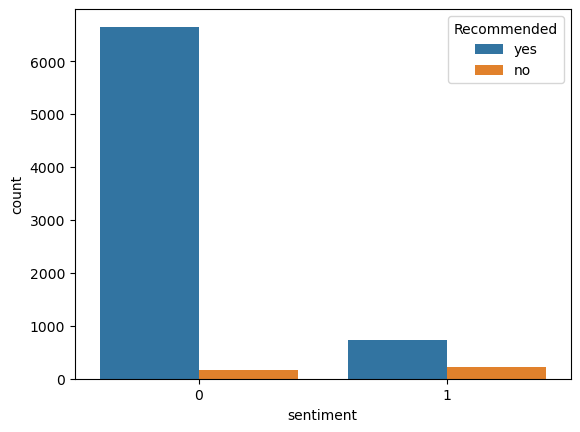

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', hue='Recommended', data=df.dropna(subset=['Recommended']))
plt.show()


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Drop rows where sentiment or Recommended are null
train_df = df.dropna(subset=['sentiment', 'Recommended'])

# Target variable with encoded values
y = train_df['Recommended_encoded']
X = train_df[['sentiment']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline for RandomForest
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values if any
    ('scaler', StandardScaler()),  # Standardize features
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Define a pipeline for SVM
svm_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values if any
    ('scaler', StandardScaler()),  # Standardize features
    ('clf', SVC(class_weight='balanced', random_state=42))
])

# Define a pipeline for KNN
knn_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values if any
    ('scaler', StandardScaler()),  # Standardize features
    ('clf', KNeighborsClassifier())
])

# Fit and evaluate RandomForest model
rf_pipeline.fit(X_train, y_train)
rf_y_pred = rf_pipeline.predict(X_test)
print("RandomForestClassifier")
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

# Fit and evaluate SVM model
svm_pipeline.fit(X_train, y_train)
svm_y_pred = svm_pipeline.predict(X_test)
print("SVC")
print(confusion_matrix(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))

# Fit and evaluate KNN model
knn_pipeline.fit(X_train, y_train)
knn_y_pred = knn_pipeline.predict(X_test)
print("KNeighborsClassifier")
print(confusion_matrix(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))

# Fill in missing 'Recommended' values in the original dataset using RandomForest pipeline
df.loc[df['Recommended'].isnull(), 'Recommended_encoded'] = rf_pipeline.predict(df.loc[df['Recommended'].isnull(), ['sentiment']])


RandomForestClassifier
[[  49   30]
 [ 147 1327]]
              precision    recall  f1-score   support

           0       0.25      0.62      0.36        79
           1       0.98      0.90      0.94      1474

    accuracy                           0.89      1553
   macro avg       0.61      0.76      0.65      1553
weighted avg       0.94      0.89      0.91      1553

SVC
[[  49   30]
 [ 147 1327]]
              precision    recall  f1-score   support

           0       0.25      0.62      0.36        79
           1       0.98      0.90      0.94      1474

    accuracy                           0.89      1553
   macro avg       0.61      0.76      0.65      1553
weighted avg       0.94      0.89      0.91      1553

KNeighborsClassifier
[[   0   79]
 [   0 1474]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.95      1.00      0.97      1474

    accuracy                           0.95      1553

C:\Users\bharu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bharu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bharu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [43]:
# using neural networks
nn_model=Sequential()
nn_model

<Sequential name=sequential, built=False>

In [44]:
nn_model.add(Dense(64,input_dim=X_train.shape[1],activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(32,activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(1, activation='sigmoid'))

C:\Users\bharu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
nn_model

<Sequential name=sequential, built=True>

In [46]:
nn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [47]:
nn_model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9214 - loss: 0.5429 - val_accuracy: 0.9421 - val_loss: 0.2363
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9559 - loss: 0.1942 - val_accuracy: 0.9421 - val_loss: 0.1918
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9475 - loss: 0.1793 - val_accuracy: 0.9421 - val_loss: 0.1921
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9496 - loss: 0.1701 - val_accuracy: 0.9421 - val_loss: 0.1924
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9495 - loss: 0.1704 - val_accuracy: 0.9421 - val_loss: 0.1926
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9511 - loss: 0.1766 - val_accuracy: 0.9421 - val_loss: 0.1938
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9492 - loss: 0.1724 - val_accuracy: 0.9421 - val_loss: 0.1948
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9568 - loss: 0.1534 - val_accuracy: 0.

In [48]:
nn_evol=nn_model.evaluate(X_test,y_test,verbose=0)

In [49]:
nn_evol

[0.16381901502609253, 0.9491307139396667]

In [50]:
df['Recommended_encoded'].isna().sum()
# replaced

0

In [51]:
input_airline = 'airasia'

# Filter the DataFrame based on conditions
filtered_flights = df[
    (df['AirName'] == input_airline) & 
    (df['Recommended_encoded'] == 1) & 
    (df['sentiment'] == 1)
]

# Display the filtered flights
print(f"Recommended '{input_airline}' flights with good reviews:")
filtered_flights[['AirName', 'Recommended_encoded', 'sentiment', 'OverallScore', 'Review']]

Recommended 'airasia' flights with good reviews:


,AirName,Recommended_encoded,sentiment,OverallScore,Review
91,airasia,1,1,1,amritsar melbourn via kuala lumpur book april ...
111,airasia,1,1,1,want credit flight least move flight covid fol...
112,airasia,1,1,10,penang singapor impress air asia staff due cov...
117,airasia,1,1,8,sister book airasia flight phuket bangalor hou...
158,airasia,1,1,9,airasia provid excel custom experi throughout ...
165,airasia,1,1,9,kuala lumpur guangzhou year old neo aircraft s...
172,airasia,1,1,9,langkawi kuala lumpur flight delay one hour du...
173,airasia,1,1,9,kuala lumpur denpasar flight delay one hour fl...
186,airasia,1,1,7,even flight worri flight might delay take land...
187,airasia,1,1,7,actual fli airasia indonesia first flight day ...


In [ ]:
aim : is to give a text bar which needs to enter flight name then according to that recommended flights need to get and null values are replaced already by imputations
using knn
output: display the neighbouring flights and other columns

In [52]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assume df is your DataFrame, and null values are already handled
# Selecting features for training
features = ['OverallScore', 'EntertainmentRating', 'FoodRating', 'ServiceRating', 'WifiRating']  # Add more relevant features
X = df[features]

# Target variables
y_recommended = df['Recommended_encoded']  # For predicting recommended flights
y_sentiment = df['sentiment']  # For predicting good or bad reviews

# Split the dataset into training and testing sets
X_train, X_test, y_recommended_train, y_recommended_test = train_test_split(X, y_recommended, test_size=0.2, random_state=42)
X_train_sentiment, X_test_sentiment, y_sentiment_train, y_sentiment_test = train_test_split(X, y_sentiment, test_size=0.2, random_state=42)

# Initialize and train the model for recommended prediction
recommended_model = RandomForestClassifier()
recommended_model.fit(X_train, y_recommended_train)

# Initialize and train the model for sentiment prediction
sentiment_model = RandomForestClassifier()
sentiment_model.fit(X_train_sentiment, y_sentiment_train)

# Save the models using pickle
with open('recommended_model.pkl', 'wb') as file:
    pickle.dump(recommended_model, file)

with open('sentiment_model.pkl', 'wb') as file:
    pickle.dump(sentiment_model, file)


In [53]:
# !pip install --upgrade imbalanced-learn
import streamlit as st
import pickle
import pandas as pd

# Load the dataset
# df = pd.read_csv('your_dataset.csv')  # Replace with your dataset

# Load the saved models
with open('recommended_model.pkl', 'rb') as file:
    recommended_model = pickle.load(file)

with open('sentiment_model.pkl', 'rb') as file:
    sentiment_model = pickle.load(file)

# Streamlit input
input_airline = st.text_input('Enter the flight name:')

# Filter the dataset based on input
if input_airline:
    filtered_flights = df[df['AirName'] == input_airline]

    if not filtered_flights.empty:
        # Extract features for prediction
        features = ['OverallScore', 'EntertainmentRating', 'FoodRating', 'ServiceRating', 'WifiRating']
        input_features = filtered_flights[features]

        # Make predictions
        recommended_pred = recommended_model.predict(input_features)
        sentiment_pred = sentiment_model.predict(input_features)

        # Add predictions to the DataFrame
        filtered_flights['Recommended_pred'] = recommended_pred
        filtered_flights['Sentiment_pred'] = sentiment_pred

        # Filter based on predicted values
        recommended_flights = filtered_flights[
            (filtered_flights['Recommended_pred'] == 1) & 
            (filtered_flights['Sentiment_pred'] == 1)
        ]

        # Display the recommended flights
        st.write(f"Recommended '{input_airline}' flights with good reviews:")
        st.write(recommended_flights[['AirName', 'OverallScore', 'EntertainmentRating', 'ServiceRating', 'Review']])
    else:
        st.write(f"No flights found for '{input_airline}'.")


2024-09-17 22:44:55.078 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-17 22:44:55.080 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-17 22:44:55.081 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-17 22:44:55.083 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2024-09-17 22:44:55.087 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-17 22:44:58.415 
  command:

    streamlit run C:\ProgramData\anaconda3\L

In [ ]:
# df['Recommended_encoded'].value_counts()
# hai
# df.head()

In [ ]:
# print(df['Recommended'].dtype)  # Check the data type of 'Recommended'


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize the LabelEncoder
# label_encoder = LabelEncoder()

# # Fit and transform the 'Recommended' column to numeric values
# df['Recommended_encoded'] = label_encoder.fit_transform(df['Recommended'])

# # Verify the transformation
# print(df[['Recommended', 'Recommended_encoded']].head())


In [ ]:
# # Separate rows with known and unknown labels
# train_df = df[df['Recommended'] != 'Unknown']
# test_df = df[df['Recommended'] == 'Unknown']

# # Training data: Features and target
# x_train = train_df[['Comments_sentiment']]
# y_train = train_df['Recommended_encoded']

# # Test data: Features for prediction
# x_test = test_df[['Comments_sentiment']]


In [ ]:
# print(df['Comments_sentiment'].isnull().sum())  # Check for missing values

# print(df['Recommended'].isnull().sum())  # Check for missing values


In [ ]:
# df['Recommended'].fillna('Unknown', inplace=True)
# print(df['Recommended'].value_counts())


In [ ]:
# test_df = df[df['Recommended'] == 'Unknown']
# print(test_df.shape)


In [ ]:
# train_df = df[df['Recommended'] != 'Unknown']
# test_df = df[df['Recommended'] == 'Unknown']

# print(train_df.shape)  # Should be non-zero
# print(test_df.shape)    # Should be non-zero if there are missing values


In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Initialize and train the classifier
# model = RandomForestClassifier()
# model.fit(x_train, y_train)

# # Predict missing values
# predicted_values = model.predict(x_test)

# # Update the missing values in the 'Recommended_encoded' column
# df.loc[df['Recommended'] == 'Unknown', 'Recommended_encoded'] = predicted_values


In [ ]:
# Convert numeric labels back to original string values
# df['Recommended'] = label_encoder.inverse_transform(df['Recommended_encoded'])


In [ ]:
hai

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# # Training the model using Decision Tree
# model = DecisionTreeClassifier().fit(x_train, y_train)

# # Predicting and updating the missing values in the 'Recommended' column
# predicted_values = model.predict(x_test)
# df.loc[df['Recommended_encoded'].isnull(), 'Recommended_encoded'] = predicted_values


In [ ]:
# df["Recommended"].value_counts()

In [ ]:
# df.shape

In [ ]:
# dataset.columns

In [ ]:
# dataset["Recommended"].value_counts()

In [ ]:
dataset['OverallScore'].value_counts()

In [ ]:
dataset['EntertainmentRating'].value_counts()    

In [ ]:
dataset.drop(dataset.index[dataset["EntertainmentRating"].apply(lambda x: not (x.strip().isnumeric()))], axis=0, inplace=True)

In [ ]:
dataset['EntertainmentRating'].value_counts()

In [ ]:
# null values can be removed



In [ ]:
# dataset.isnull().sum()

In [ ]:
# dataset["Recommended"].value_counts()
# dataset["Recommended"].isna().sum()

In [ ]:
# dataset["Recommended"]=dataset["Recommended"].astype(int)

In [ ]:
# print(dataset["Recommended"].value_counts())
# print(dataset["EntertainmentRating"].value_counts())
# print(dataset["GroundServiceRating"].value_counts())
# print(dataset["OverallScore"].value_counts())
# print(dataset["SeatComfortRating"].value_counts())
# print(dataset["ServiceRating"].value_counts())
# print(dataset["ValueRating"].value_counts())


In [ ]:
# for ind in dataset.index:
#     if dataset["Recommended"][ind] == 0:
#         if dataset["EntertainmentRating"][ind] >'2':
#             if dataset["GroundServiceRating"][ind] >2:
#                 if dataset["OverallScore"][ind] >5:
#                     if dataset["SeatComfortRating"][ind] >'2':
#                         if dataset["ServiceRating"][ind] >2:
#                             if dataset["ValueRating"][ind] >2:
#                                 dataset["Recommended"][ind]=1

In [ ]:
# dataset["Recommended"].value_counts()

In [ ]:
# dataset["Recommended"].hist()

In [ ]:
# dataset.isnull().sum()

In [ ]:
# dataset.dropna(inplace=True)

In [ ]:
# dataset.isnull().sum()

In [ ]:
# dataset['ReviewDate'].value_counts()

In [ ]:
# import datetime

# def dateconv(strr):
    
#     # Parse the date string into a datetime object
#     date_str = strr # 9th November 2022
#     try:
#         date = datetime.datetime.strptime(date_str, "%dth %B %Y")
#     except ValueError:
#         try:
#             date = datetime.datetime.strptime(date_str, "%dst %B %Y")
#         except ValueError:
#             try:
#                 date = datetime.datetime.strptime(date_str, "%dnd %B %Y")
#             except ValueError:
#                 try:
#                     date = datetime.datetime.strptime(date_str, "%drd %B %Y") 
#                 except:
#                     print(date_str)
#                     print("something went wrong!")
    
#     finally:
#         # Extract the day, month, and year from the datetime object
#         day = date.day
#         month = date.month
#         year = date.year

#         # Convert the day, month, and year to strings, and pad with zeros as necessary
#         day_str = str(day).zfill(2)
#         month_str = str(month).zfill(2)
#         year_str = str(year)[2:]

#         # Concatenate the day, month, and year strings to create the final integer
#         int_date = day_str + month_str + year_str
#     #     print(int_date)  # Output: "091122"
#     return int_date


In [ ]:
# for ind in dataset.index:
#     try:
#         if int(dataset["ReviewDate"][ind]) < 311223:
#             continue
#     except ValueError:
#         dataset["ReviewDate"][ind]=dateconv(dataset["ReviewDate"][ind])

In [ ]:
# dataset['ReviewDate'].value_counts()

In [ ]:
# dataset.head()//

In [ ]:
# dataset.describe

In [ ]:
# dataset.head()

In [ ]:
# len(dataset['AirName'].unique())

In [ ]:
data=dataset

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

In [ ]:
features = data.drop(columns=[ 'Recommended'])
target = data['Recommended']

# Define feature types
numeric_features = ['EntertainmentRating', 'GroundServiceRating', 'OverallScore', 'SeatComfortRating', 'ServiceRating', 'ValueRating', 'WifiRating']
categorical_features = ['AirName', 'SeatType', 'ReviewrCountry']
text_feature = 'Comments'

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words='english'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, text_feature)
    ]
)

# Apply preprocessing
X = preprocessor.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)

# Create and fit KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
print(preprocessor)


In [ ]:
# Apply preprocessing and fit KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
X = preprocessor.fit_transform(features)
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(X)

# Find the nearest neighbors for a specific user or sample

input1=330
distances, indices = knn.kneighbors(X[input1].reshape(1, -1))

print("Nearest neighbors' indices:", indices)
print("Distances to nearest neighbors:", distances)
recommended_flights = data.iloc[indices[0]]
# print(recommended_flights)
recommended_flights[['AirName', 'OverallScore', 'SeatType', 'Comments']]

In [ ]:
# ////////////////////////////////svm//////////////////////////////////////////////////////

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
# /////////////////////////////////////////////linear////////////////////////////////////////////////////////////////////////

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)

# Train SVM model
model = LinearRegression()
model.fit(X_train, y_train)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

In [ ]:
dataset.columns

In [ ]:
# ////////////////////////////////////////decision tree//////////////////////////////////////////////////////////////////////////

In [ ]:
Train the Model: Fit the decision tree to your training data.

Evaluate the Model: Make predictions on the test set and evaluate the model using metrics like accuracy, precision, recall, and F1 score.

Tune Hyperparameters: Adjust parameters such as tree depth, minimum samples per leaf, and split criteria to optimize performance.

Visualize: Consider visualizing the decision tree to understand its structure and decisions.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Hyperperametarising

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)
[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
from sklearn.model_selection import RandomizedSearchCV
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)
{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

In [ ]:
best_rf=rf_random.best_estimator_
y_pred=best_rf.predict(X_test)
print(classification_report(y_test,y_pred))


In [ ]:
Results for different models:-
KNN:
precision    recall  f1-score   support

           0       0.96      0.95      0.96      3431
           1       0.93      0.94      0.94      2216

    accuracy                           0.95      5647
   macro avg       0.95      0.95      0.95      5647
weighted avg       0.95      0.95      0.95      5647

Desicion tree:
precision    recall  f1-score   support

           0       0.95      0.97      0.96      3431
           1       0.96      0.92      0.94      2216

    accuracy                           0.95      5647
   macro avg       0.95      0.95      0.95      5647
weighted avg       0.95      0.95      0.95      5647

svm:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3431
           1       0.94      0.94      0.94      2216

    accuracy                           0.96      5647
   macro avg       0.95      0.95      0.95      5647
weighted avg       0.96      0.96      0.96      5647

In [ ]:
# //////////////////////////////neural networks/////////////////////////////////////////////////

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# using neural networks
nn_model=Sequential()
nn_model

In [ ]:
nn_model.add(Dense(64,input_dim=X_train.shape[1],activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(32,activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(1, activation='sigmoid'))

In [ ]:
nn_model

In [ ]:
nn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
nn_model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

In [ ]:
nn_evol=nn_model.evaluate(X_test,y_test,verbose=0)

In [ ]:
nn_evol

In [ ]:
# we can also do this using the sentimental analysis like using only the reviews and findin gthe similarity between them and directly show casing the best reviws recommendations

In [ ]:
# pip install textblob

In [ ]:
ds=data
from textblob import TextBlob

def classify_sentiment(review):
    analysis = TextBlob(review)
    return 'good' if analysis.sentiment.polarity > 0 else 'bad'
ds['sentiment'] = ds['Review'].apply(classify_sentiment)
ds['sentiment']

In [ ]:
ds['Review']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

flights=ds['Review']
# Vectorize the text
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(flights)

# Compute similarity matrix
similarity_matrix = cosine_similarity(tfidf_matrix)


In [ ]:
similarity_matrix 

In [ ]:
import numpy as np

def recommend_flights(flight_index, similarity_matrix, num_recommendations=10):
    # Get similarity scores for the given flight
    sim_scores = list(enumerate(similarity_matrix[flight_index]))
    
    # Sort flights based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get indices of top recommended flights
    flight_indices = [i[0] for i in sim_scores[1:num_recommendations + 1]]
    
    return flight_indices

recommended_indices = recommend_flights(0, similarity_matrix)




In [ ]:
# Prepare data for plotting
recommended_flights = [ds.iloc[i]['AirName'] for i in recommended_indices]
print(len(recommended_flights
    ))
scores = [similarity_matrix[0][i] for i in recommended_indices]

# Create DataFrame for plotting
plot_data = pd.DataFrame({
    'AirName': recommended_flights,
    'Score': scores
})

# Plot with Seaborn
plt.figure(figsize=(20, 8))
sns.barplot(x='AirName', y='Score', data=plot_data)
plt.title('Top Recommended Flights')
plt.xlabel('Flight ID')
plt.ylabel('Similarity Score')
plt.show()